# NLTK Examples

## Counting words from Brown corpus

I import the brown corpus from nltk for learning how to process text. 

The brown corpus is a collection of 500 texts labeled in categories such as humor, religion, news etc. 

In [1]:
import nltk
from nltk.corpus import brown

In [2]:
print(brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [3]:
brown

<CategorizedTaggedCorpusReader in '/home/raquel/nltk_data/corpora/brown'>

In [ ]:
genres = ['fiction', 'humor', 'romance']
whwords = ['what', 'which', 'how', 'why', 'when', 'where', 'who']

I take the words of the genre fiction. 

In [21]:
genre_text = brown.words(categories = genres[0])

** FreqDist()** accepts a list of words and returns an object that contains the map word and its respective frequency in the input word list

In [17]:
fdist = nltk.FreqDist(genre_text)
print(list(fdist.keys())[0:50])

['They', 'neither', 'liked', 'nor', 'disliked', 'the', 'Old', 'Man', '.', 'To', 'them', 'he', 'could', 'have', 'been', 'broken', 'bell', 'in', 'church', 'tower', 'which', 'rang', 'before', 'and', 'after', 'Mass', ',', 'at', 'noon', 'six', 'each', 'evening', '--', 'its', 'tone', 'repetitive', 'monotonous', 'never', 'breaking', 'boredom', 'of', 'streets', 'The', 'was', 'unimportant', 'Yet', 'if', 'were', 'not', 'there']


Whe count the wh words

In [18]:
for wh in whwords:
    print(wh + ':', fdist[wh], end=' ')

what: 121 which: 104 how: 60 why: 34 when: 126 where: 54 who: 89 

Now I do it for every genre.

In [19]:
for i in range(0,len(genres)):
    genre = genres[i]
    print()
    print("Analysing '"+ genre + "' wh words")
    genre_text = brown.words(categories = genre)
    print('Total words:', len(genre_text))
    fdist = nltk.FreqDist(genre_text)
    for wh in whwords:
        print(wh + ':', fdist[wh], end=' ')


Analysing 'fiction' wh words
Total words: 68488
what: 128 which: 123 how: 54 why: 18 when: 133 where: 76 who: 103 
Analysing 'humor' wh words
Total words: 21695
what: 36 which: 62 how: 18 why: 9 when: 52 where: 15 who: 48 
Analysing 'romance' wh words
Total words: 70022
what: 121 which: 104 how: 60 why: 34 when: 126 where: 54 who: 89 

## Frequency distribution ussing web corpus

In [23]:
from nltk.corpus import webtext
print(webtext.fileids())

['firefox.txt', 'grail.txt', 'overheard.txt', 'pirates.txt', 'singles.txt', 'wine.txt']


Now we will select the file that contains personal advertisement data and and run frequency distribution on it. Add the following three lines for it:

In [24]:
fileid = 'singles.txt'
wbt_words = webtext.words(fileid)
fdist = nltk.FreqDist(wbt_words)

I do a preliminar analysis counting the maximum appearing token, the total number of tokens and the 10 most common words.

In [25]:
print('Count of the maximum appearing token "',fdist.max(),'" : ', fdist[fdist.max()])

Count of the maximum appearing token " , " :  539


In [26]:
print('Total Number of distinct tokens in the bag : ', fdist.N())

Total Number of distinct tokens in the bag :  4867


In [28]:
print('Following are the most common 10 words in the bag')
print(fdist.most_common(10))

Following are the most common 10 words in the bag
[(',', 539), ('.', 353), ('/', 110), ('for', 99), ('and', 74), ('to', 74), ('lady', 68), ('-', 66), ('seeks', 60), ('a', 52)]


Tabulate function gives all the frecuency distributions

In [32]:
print('Frequency Distribution on Personal Advertisements')
print(fdist.tabulate())

Frequency Distribution on Personal Advertisements
             ,              .              /            for            and             to           lady              -          seeks              a           with              S           ship              &   relationship            fun             in           slim          build              o              s              y         smoker             50            non              I         movies           good         honest         dining            out          rship        looking           like            age     attractive            who     friendship             40             45             35        Looking              5           MALE          times           male           meet           life        seeking              r           open            the         female             of           GSOH          enjoy             ''            fit             or           LADY            guy             no             be      

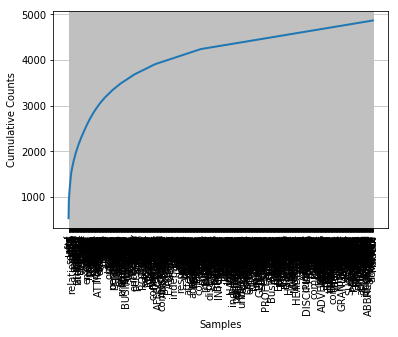

In [42]:
%matplotlib inline
plt = fdist.plot(cumulative=True)

## Basic WordNet concepts

** Synsets:**

In [44]:
from nltk.corpus import wordnet as wn
chair = 'chair'

In [45]:
chair_synsets = wn.synsets(chair)
print('Synsets/Senses of Chair :', chair_synsets, '\n\n')

Synsets/Senses of Chair : [Synset('chair.n.01'), Synset('professorship.n.01'), Synset('president.n.04'), Synset('electric_chair.n.01'), Synset('chair.n.05'), Synset('chair.v.01'), Synset('moderate.v.01')] 




In [46]:
for synset in chair_synsets:
  print(synset, ': ')
  print('Definition: ', synset.definition())
  print('Lemmas/Synonymous words: ', synset.lemma_names())
  print('Example: ', synset.examples(), '\n')

Synset('chair.n.01') : 
Definition:  a seat for one person, with a support for the back
Lemmas/Synonymous words:  ['chair']
Example:  ['he put his coat over the back of the chair and sat down'] 

Synset('professorship.n.01') : 
Definition:  the position of professor
Lemmas/Synonymous words:  ['professorship', 'chair']
Example:  ['he was awarded an endowed chair in economics'] 

Synset('president.n.04') : 
Definition:  the officer who presides at the meetings of an organization
Lemmas/Synonymous words:  ['president', 'chairman', 'chairwoman', 'chair', 'chairperson']
Example:  ['address your remarks to the chairperson'] 

Synset('electric_chair.n.01') : 
Definition:  an instrument of execution by electrocution; resembles an ordinary seat for one person
Lemmas/Synonymous words:  ['electric_chair', 'chair', 'death_chair', 'hot_seat']
Example:  ['the murderer was sentenced to die in the chair'] 

Synset('chair.n.05') : 
Definition:  a particular seat in an orchestra
Lemmas/Synonymous words:

**Hypernims and Hyponims:**

In [49]:
woman = wn.synset('woman.n.02')
bed = wn.synset('bed.n.01')

In [50]:
print(woman.hypernyms())
woman_paths = woman.hypernym_paths()

[Synset('female.n.02')]


In [51]:
for idx, path in enumerate(woman_paths):
  print('\n\nHypernym Path :', idx + 1)
for synset in path:
  print(synset.name(), ', ', end='')



Hypernym Path : 1


Hypernym Path : 2
entity.n.01 , physical_entity.n.01 , object.n.01 , whole.n.02 , living_thing.n.01 , organism.n.01 , person.n.01 , female.n.02 , woman.n.02 , 

In [53]:
types_of_beds = bed.hyponyms()
print('\n\nTypes of beds(Hyponyms): ', types_of_beds)



Types of beds(Hyponyms):  [Synset('berth.n.03'), Synset('built-in_bed.n.01'), Synset('bunk.n.03'), Synset('bunk_bed.n.01'), Synset('cot.n.03'), Synset('couch.n.03'), Synset('deathbed.n.02'), Synset('double_bed.n.01'), Synset('four-poster.n.01'), Synset('hammock.n.02'), Synset('marriage_bed.n.01'), Synset('murphy_bed.n.01'), Synset('plank-bed.n.01'), Synset('platform_bed.n.01'), Synset('sickbed.n.01'), Synset('single_bed.n.01'), Synset('sleigh_bed.n.01'), Synset('trundle_bed.n.01'), Synset('twin_bed.n.01'), Synset('water_bed.n.01')]


In [54]:
print(sorted(set(lemma.name() for synset in types_of_beds for lemma in synset.lemmas())))

['Murphy_bed', 'berth', 'built-in_bed', 'built_in_bed', 'bunk', 'bunk_bed', 'camp_bed', 'cot', 'couch', 'deathbed', 'double_bed', 'four-poster', 'hammock', 'marriage_bed', 'plank-bed', 'platform_bed', 'sack', 'sickbed', 'single_bed', 'sleigh_bed', 'truckle', 'truckle_bed', 'trundle', 'trundle_bed', 'twin_bed', 'water_bed']


**Polysemy**

In [63]:
type = 'n'
synsets = wn.all_synsets(type)

In [64]:
lemmas = []
for synset in synsets:
    for lemma in synset.lemmas():
        lemmas.append(lemma.name())

In [65]:
lemmas = set(lemmas)

In [66]:
count = 0
for lemma in lemmas:
    count = count + len(wn.synsets(lemma, type))

In [68]:
count

152763

In [69]:
print('Total distinct lemmas: ', len(lemmas))
print('Total senses :',count)
print('Average Polysemy of ', type,': ' , count/len(lemmas))

Total distinct lemmas:  119034
Total senses : 152763
Average Polysemy of  n :  1.2833560159282222
